# Question: “ What is the probability of landing on Boardwalk within the first 10 turns?"

# I chose Monopoly as my tabletop game, and although it already has AI that learnt to play it, I want to experience how the simulation works. Since I want to experience how the simulation works, that means I will be conducting an observational study because we are not applying any conditions to specific variables. I think I'm going to observe the spots, the cards especially the chance card we need to observe every space. 
## One trial constitutes of what card you are taking and many of your first few cards.   
## I'm measuring the probability outcome and how does rolling a double affect that.

In [31]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
def simulate_trial(turns=10):
    position = 0  # start at GO
    for _ in range(turns):
        roll = random.randint(1,6) + random.randint(1,6)  # roll 2 dice
        position = (position + roll) % 40  # move around the board
        if position == 39:  # landed on Boardwalk
            return True
    return False

def run_simulation(trials=100000, turns=10):
    successes = sum(simulate_trial(turns) for _ in range(trials))
    probability = successes / trials
    return probability

# Run the simulation
prob = run_simulation()
print(f"Estimated Probability of landing on Boardwalk within 10 turns: {prob:.4f}")

Estimated Probability of landing on Boardwalk within 10 turns: 0.1686


In [33]:
def simulate_trial(turns=10):
    position = 0
    for turn in range(1, turns+1):
        roll = random.randint(1,6) + random.randint(1,6)
        position = (position + roll) % 40
        if position == 39:  # landed on Boardwalk
            return str(turn)  # return the turn number as string for plotting
    return "Never"  # didn't hit within given turns

def run_simulation(trials=200, turns=10):
    results = []
    for _ in range(trials):
        outcome = simulate_trial(turns)
        results.append(outcome)
    return results

# Run the simulation
results = run_simulation()

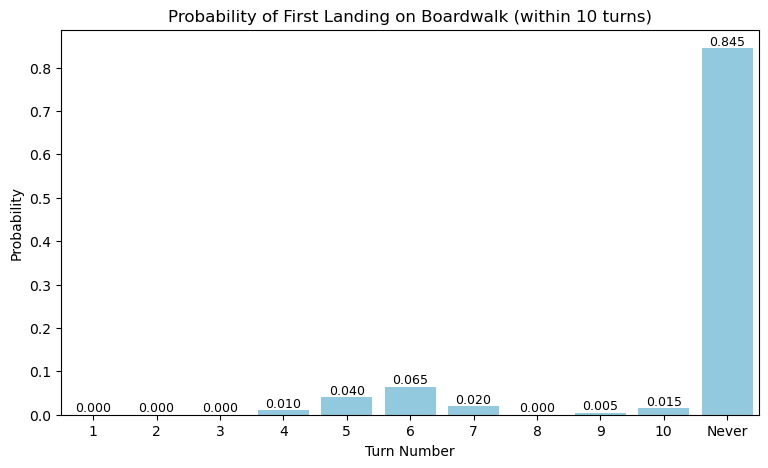

In [34]:
# Convert to DataFrame
df = pd.DataFrame(results, columns=["Outcome"])

# Compute probabilities
probabilities = df["Outcome"].value_counts(normalize=True)

# Ensure proper order (1–10 then Never)
categories = [str(i) for i in range(1, 11)] + ["Never"]
probabilities = probabilities.reindex(categories, fill_value=0).reset_index()
probabilities.columns = ["Turn", "Probability"]

# Plot with seaborn
plt.figure(figsize=(9,5))
ax = sns.barplot(x="Turn", y="Probability", data=probabilities, color="skyblue")

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.3f}", 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9, color="black", rotation=0)

plt.xlabel("Turn Number")
plt.ylabel("Probability")
plt.title("Probability of First Landing on Boardwalk (within 10 turns)")
plt.show()

# Conclusion: Based on the 200 simulated Monopoly, the probability of landing on a Boardwalk within your first 10 turns is about 4% as most players don't land on it that fast or at all. The bar chart shows that 92% of players never reach the boardwalk during that time while the remaining 8% does. This shows that landing on the Boardwalk that early in the game is rare.